# Plot the shortest distance between the Canary islands

In [8]:
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import contextily as ctx
import csv
import geojson
import numpy as np
import cartopy.feature as cfeature
import haversine
import geopy
import hikinggc

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from matplotlib.font_manager import FontProperties
plt.style.use("../python/hiking.mplstyle")
coast = cfeature.GSHHSFeature(scale="full")

fontawesome, fontreg, fontbold = hikinggc.load_fonts()
plt.style.use("./hiking.mplstyle")
fawesome = hikinggc.fawesome

In [2]:
coastdir = "../Data/Coastline/"
coastdir = "../../../../data/Coastline/"
figdir = "../figures/coastline"
os.path.isdir(figdir)

True

In [3]:
summits = {"tenerife": (28.27276, -16.64236),
            "grancanaria": (27.96085, -15.57120),
            "lapalma": (28.75448, -17.88511),
            "elhierro": (27.72919, -18.04044), 
            "lagomera": (28.10975, -17.24834),
            "fuerteventura": (28.10182, -14.35552),
            "lanzarote": (29.11927, -13.52098),
          }

In [4]:
island_longnames = {
            "tenerife": "Tenerife",
            "grancanaria": "Gran-Canaria",
            "lapalma": "La-Palma",
            "elhierro": "El-Hierro", 
            "lagomera": "La-Gomera",
            "fuerteventura": "Fuerteventura",
            "lanzarote": "Lanzarote",
          }

In [14]:
gccoords = read_coords_islands_hr(os.path.join(coastdir, "grancanaria.geojson"))
totalpoints = 0
for cc in gccoords:
    totalpoints += len(cc)
    print(len(cc))
print(f"Number of points: {totalpoints}")

14
42
14
11
62
28
25
21
47
41
25
26
15
9
11
9
48
22
17
17
16
14
11
12
61
34
29
29
29
25
20
10
11
7
57
57
28
20
28
19
17
24
17
14
13
14
11
11
11
11
8
43
47
24
41
18
26
21
16
16
15
16
14
17
16
16
13
12
19
12
13
15
13
18
19
22
13
11
13
10
12
11
39
26
18
70
21
20
17
13
12
13
17
9
51
47
61
62
48
63
16
20
19
18
16
9
17
8
18
146061
162
37
56
55
61
91
38
81
42
68
41
40
48
24
22
22
32
43
30
25
48
44
18
27
22
33
16
51
34
23
64
20
18
26
20
15
18
20
17
38
44
21
14
24
48
19
25
17
30
16
11
29
16
22
21
11
14
11
15
14
14
27
59
14
27
23
20
27
22
22
25
24
20
19
16
5
17
18
20
20
17
16
14
16
15
14
15
14
15
12
13
13
13
13
12
13
11
Number of points: 151240


In [5]:
def read_coords_island(geojsonfile:str) -> list:
    with open(geojsonfile) as f:
        gj = geojson.load(f)
    features = gj['features'][0]
    coords = features["geometry"]["coordinates"]
    return coords

def add_island(coords, ax, thecolor=".2"):
    for cc in coords:
        for aa in cc:
            ax.plot(*zip(*aa), "-", linewidth=.1, color="w", transform=datacrs, zorder=2)
            #ax.plot(*zip(*aa), "-", linewidth=.5, color=thecolor, transform=datacrs, zorder=4)
            
def add_island_hr(coords, ax, thecolor=".2"):
    for cc in coords:
        ax.plot(*zip(*cc), "-", linewidth=.1, color="w", transform=datacrs, zorder=2)
        #ax.plot(*zip(*aa), "-", linewidth=.5, color=thecolor, transform=datacrs, zorder=4)

def read_coords_islands_hr(geosjonfile:str) -> list:
    with open(geosjonfile) as f:
        gj = geojson.load(f)
    allcoords = []
    nf = len(gj["features"])
    for ii in range(0, nf):
        allcoords.append(gj["features"][ii]["geometry"]["coordinates"][0])
    return allcoords

def make_minimap(lon1, lat1, island1, island2, deltalat=0.02, deltalon=0.03):
    provider = ctx.providers.OpenStreetMap.Mapnik
    backgroundfile = f"../Data/Basemaps/{island1}_{island2}.tif"
    if not(os.path.exists(backgroundfile)):
        background, backextend = ctx.bounds2raster(lon1 - deltalon, lat1 - deltalat, 
                                                   lon1 + deltalon, lat1 + deltalat,
                           ll=True,
                           path=backgroundfile,
                           source=provider, zoom=15)
    vis = hikinggc.Visible()
    vis.read_geotiff(backgroundfile)
    
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot(111, projection=hikinggc.data_crs)
    ax.set_extent([lon1-deltalon, lon1+deltalon, lat1-deltalat, lat1+deltalat])
    ax.text(lon1, lat1, "\uf3c5", fontproperties=fawesome, fontsize=14, 
            ha="center", va="bottom", color="#0EA23D",
            transform=hikinggc.data_crs, zorder=7)
    ax.imshow(vis.image, origin='upper', extent=vis.extent, transform=ccrs.epsg(3857), 
              regrid_shape=2000, zorder=2)
    fname = f"shortest_{island1}_{island2}"
    plt.savefig(os.path.join(hikinggc.figdir, fname))
    plt.close()

In [6]:
doplot = False

## Each pair of islands

Same island
Same island
Same island
Same island



KeyboardInterrupt



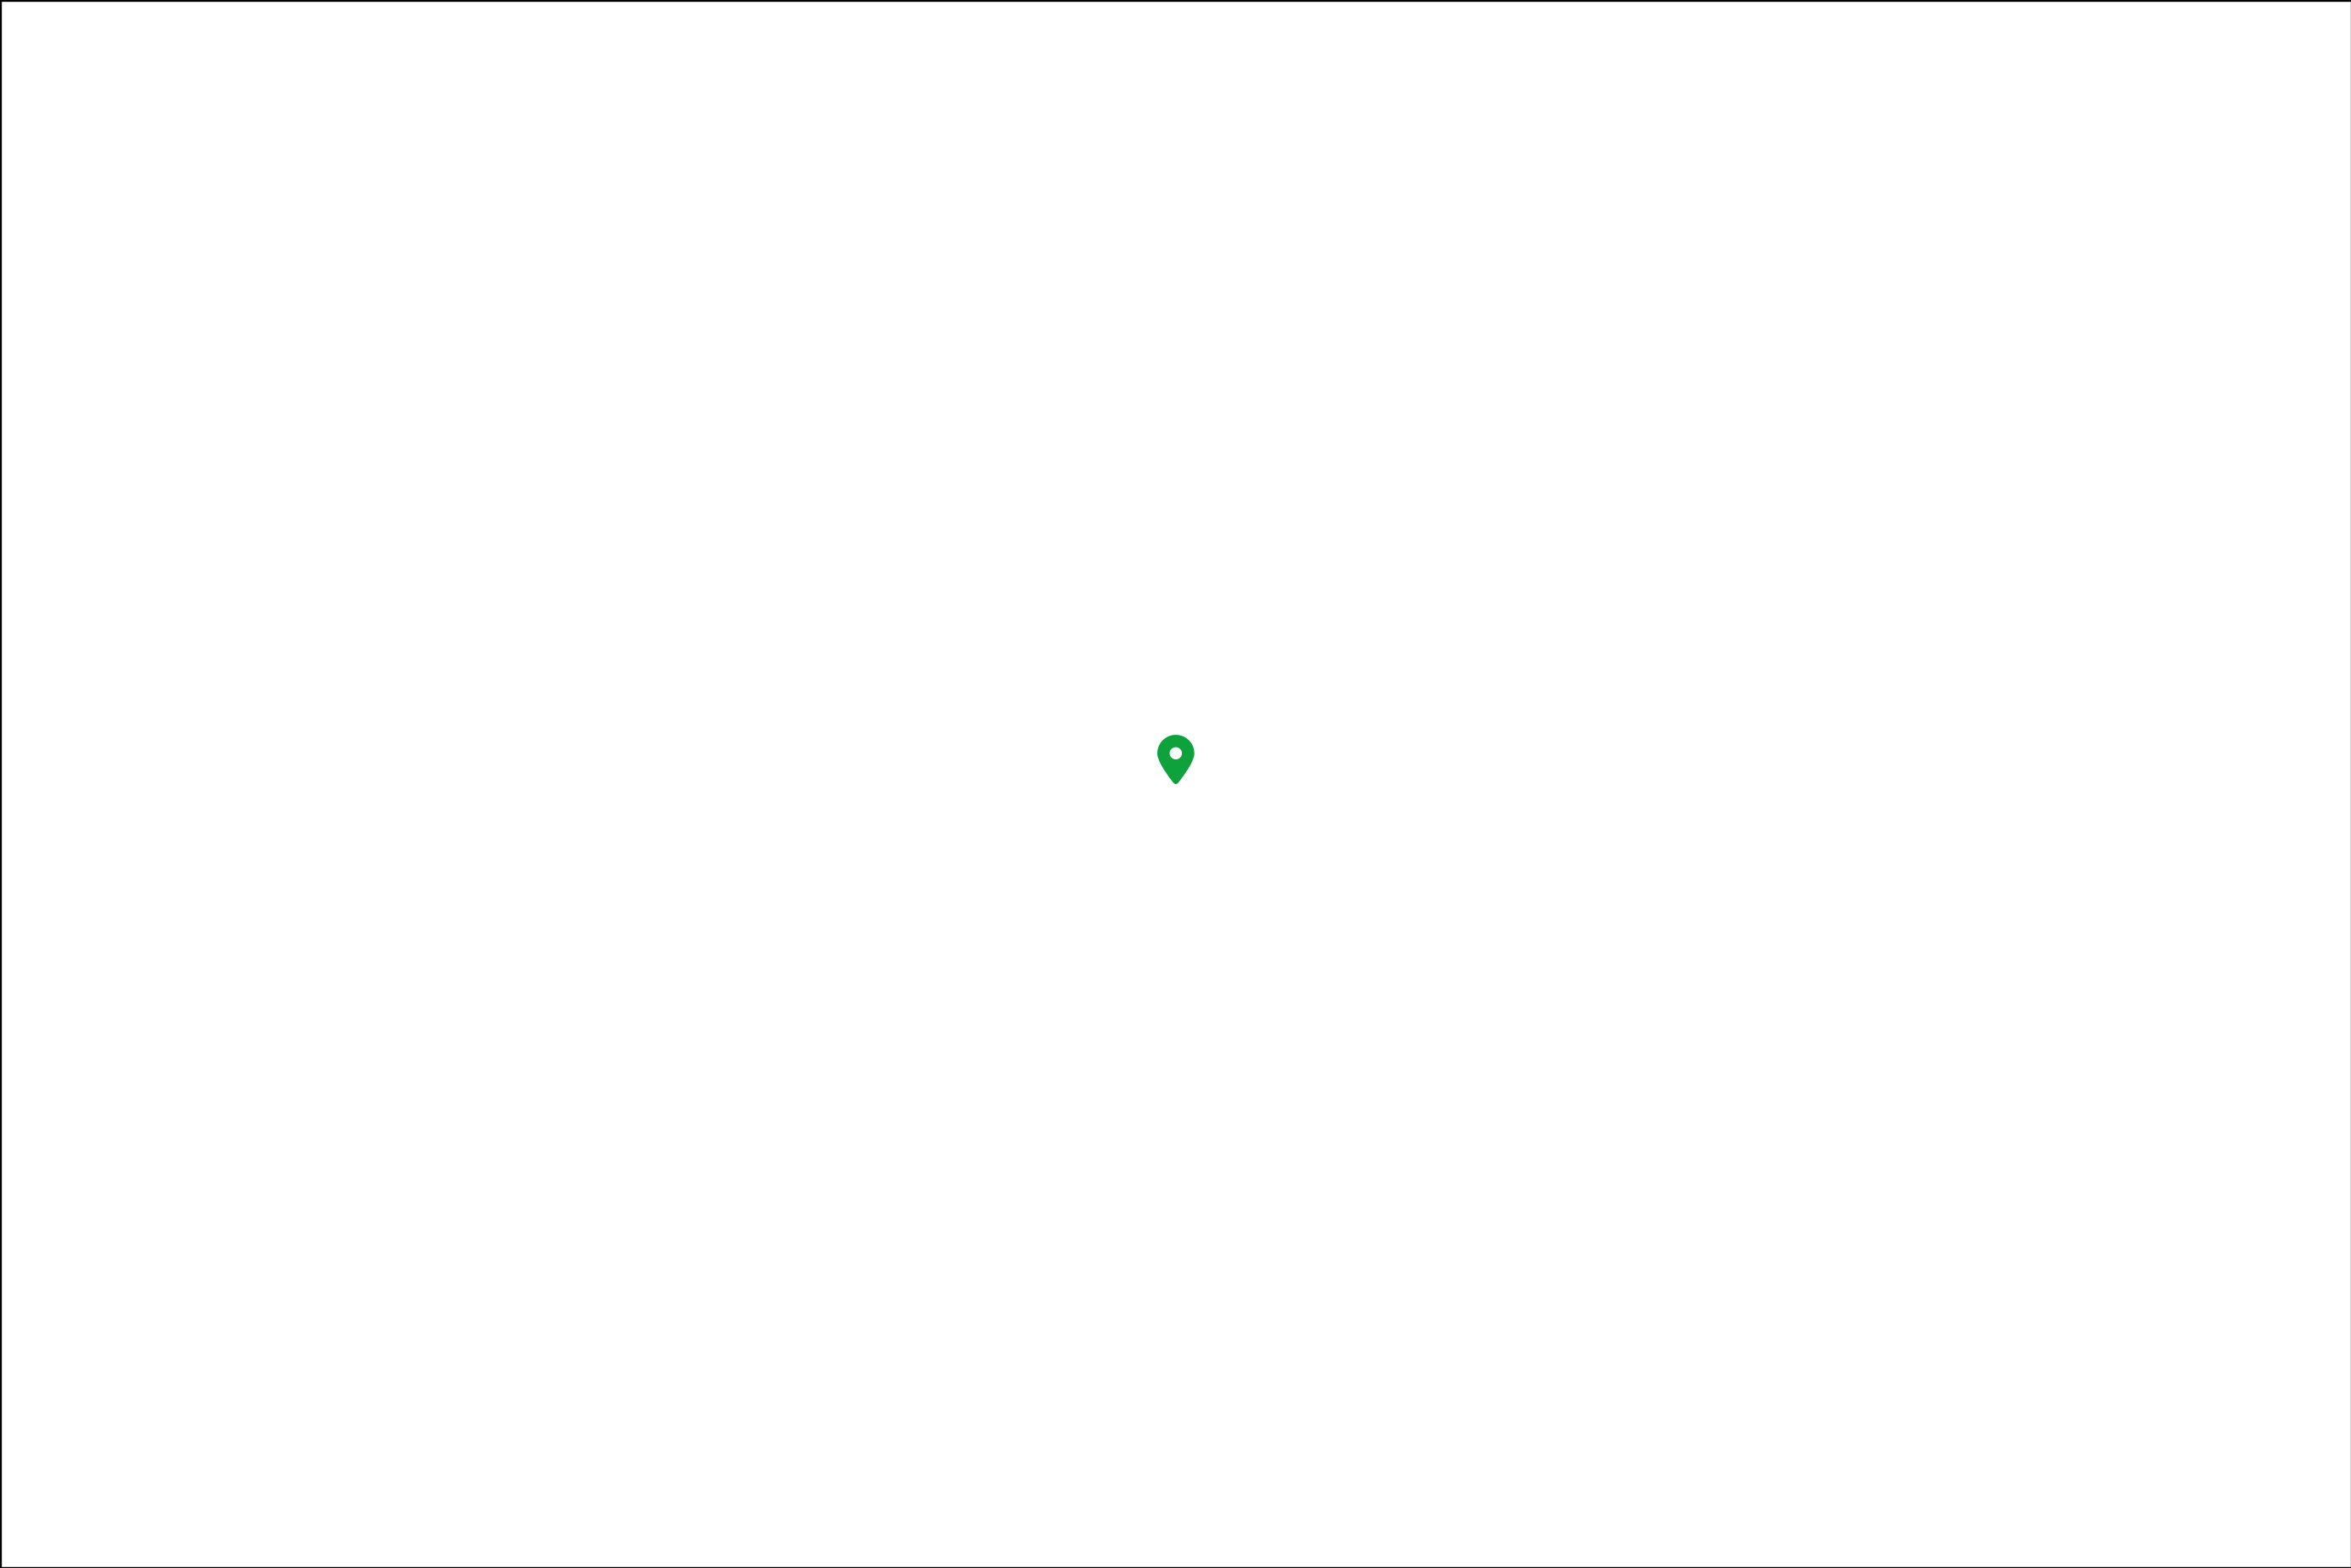

In [7]:
distancefile = "../Data/distance_islands.txt"
with open(distancefile, 'r') as df:
    for lines in df:
        lsplit = lines.rstrip().split(",")
        island1 = lsplit[0].strip()
        island2 = lsplit[1].strip()
        
        #figdir = f"/home/ctroupin/Projects/Perso/canary-visibility/content/{island_longnames[island1]}/{island_longnames[island2]}/"
        figdir = "../figures/coastline/"
        
        if not(os.path.isdir(figdir)):
            os.makedirs(figdir)
        if island1 != island2:
            
            lon1 = float(lsplit[3])
            lat1 = float(lsplit[2])
            lon2 = float(lsplit[5])
            lat2 = float(lsplit[4])
            
            # Compute min distance
            mindist = round(haversine.haversine([lat1, lon1], [lat2, lon2]), ndigits=1)
            
            # Create mini map
            make_minimap(lon1, lat1, island1, island2)
            make_minimap(lon2, lat2, island2, island1)

            if doplot:
                
                # Read the corresponding islands
                coastfile1 = os.path.join(coastdir, f"{island1}.geojson")
                coastfile2 = os.path.join(coastdir, f"{island2}.geojson")
                coords1 = read_coords_islands_hr(coastfile1)
                coords2 = read_coords_islands_hr(coastfile2)
            
            
                fig = plt.figure(figsize=(12, 8))
                ax = plt.subplot(111, projection=hikinggc.main_crs)
                ax.plot([lon1, lon2], [lat1, lat2], "k--", ms=3, transform=datacrs, zorder=6)
                ax.text(lon1, lat1, "\uf3c5", fontproperties=fawesome, fontsize=14, 
                        ha="center", va="bottom",
                        transform=datacrs, zorder=7)
                ax.text(lon2, lat2, "\uf3c5", fontproperties=fawesome, fontsize=14, 
                        ha="center", va="bottom",
                        transform=datacrs, zorder=7)

                # Add summits
                ax.plot([summits[island1][1], summits[island2][1]], [summits[island1][0], summits[island2][0]], 
                        "k:", ms=3, transform=datacrs, zorder=6)

                ax.text(summits[island1][1], summits[island1][0], "\uf6fc", 
                        fontproperties=fawesome, fontsize=14, 
                        ha="center", va="bottom",
                        transform=datacrs, zorder=7)

                ax.text(summits[island2][1], summits[island2][0], "\uf6fc", 
                        fontproperties=fawesome, fontsize=14, 
                        ha="center", va="bottom",
                        transform=datacrs, zorder=7)

                summitdist = round(haversine.haversine(summits[island1], summits[island2]), ndigits=1)


                ttt = ax.text(0.4 * summits[island1][1] + 0.6 * summits[island2][1], 
                              0.4 * summits[island1][0] + 0.6 * summits[island2][0], f"{summitdist} km", 
                              fontproperties=myfont, 
                              ha="center", va="center", transform=datacrs, fontsize=16, zorder=7)
                ttt.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='.9'))

                # Add markers
                ttt = ax.text(0.6 * lon1 + 0.4 * lon2, 0.6 * lat1 + 0.4 * lat2, f"{mindist} km", 
                              fontproperties=myfont, 
                              ha="center", va="center", transform=datacrs, fontsize=16, zorder=7)
                ttt.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='.9'))
                add_island_hr(coords1, ax)
                add_island_hr(coords2, ax)

                # Extend if needed
                theextent = ax.get_extent()
                width = theextent[1] - theextent[0]
                height = theextent[3] - theextent[2]
                deltawidth = (0.5 * height - width) / 2

                if width/height < 0.5:
                    print("Resizing")
                    ax.set_extent((theextent[0] - 10. *  deltawidth, theextent[1] + 10 * deltawidth, 
                                   theextent[2], theextent[3]), crs=myproj)


                ax.add_feature(coast, linestyle="--", color=".85", linewidth=.5, zorder=1)
                ax.spines['geo'].set_color("w")

                # Save figure in the correct directory
                figname = f"mindist_{island1}_{island2}_hr"
                plt.savefig(os.path.join(figdir, figname))
                print(f"Printing {figname} in {figdir}")
                plt.close()
        else:
            print(f"Same island")

## Each island and all its neighbours

In [14]:
hikinggc.iccoords

(-18.5, -13.25, 27.49, 29.505)

elhierro
elhierro -- fuerteventura -- elhierro
elhierro -- grancanaria -- elhierro
elhierro -- lagomera -- elhierro
elhierro -- lanzarote -- elhierro
elhierro -- lapalma -- elhierro
elhierro -- tenerife -- elhierro
fuerteventura -- elhierro -- elhierro
elhierro_all
fuerteventura -- fuerteventura -- fuerteventura
fuerteventura -- grancanaria -- fuerteventura
fuerteventura -- lagomera -- fuerteventura
fuerteventura -- lanzarote -- fuerteventura
fuerteventura -- lapalma -- fuerteventura
fuerteventura -- tenerife -- fuerteventura
grancanaria -- elhierro -- fuerteventura
fuerteventura_all
grancanaria -- fuerteventura -- grancanaria
grancanaria -- grancanaria -- grancanaria
grancanaria -- lagomera -- grancanaria
grancanaria -- lanzarote -- grancanaria
grancanaria -- lapalma -- grancanaria
grancanaria -- tenerife -- grancanaria
lagomera -- elhierro -- grancanaria
grancanaria_all
lagomera -- fuerteventura -- lagomera
lagomera -- grancanaria -- lagomera
lagomera -- lagomera -- lagomera
lagomera

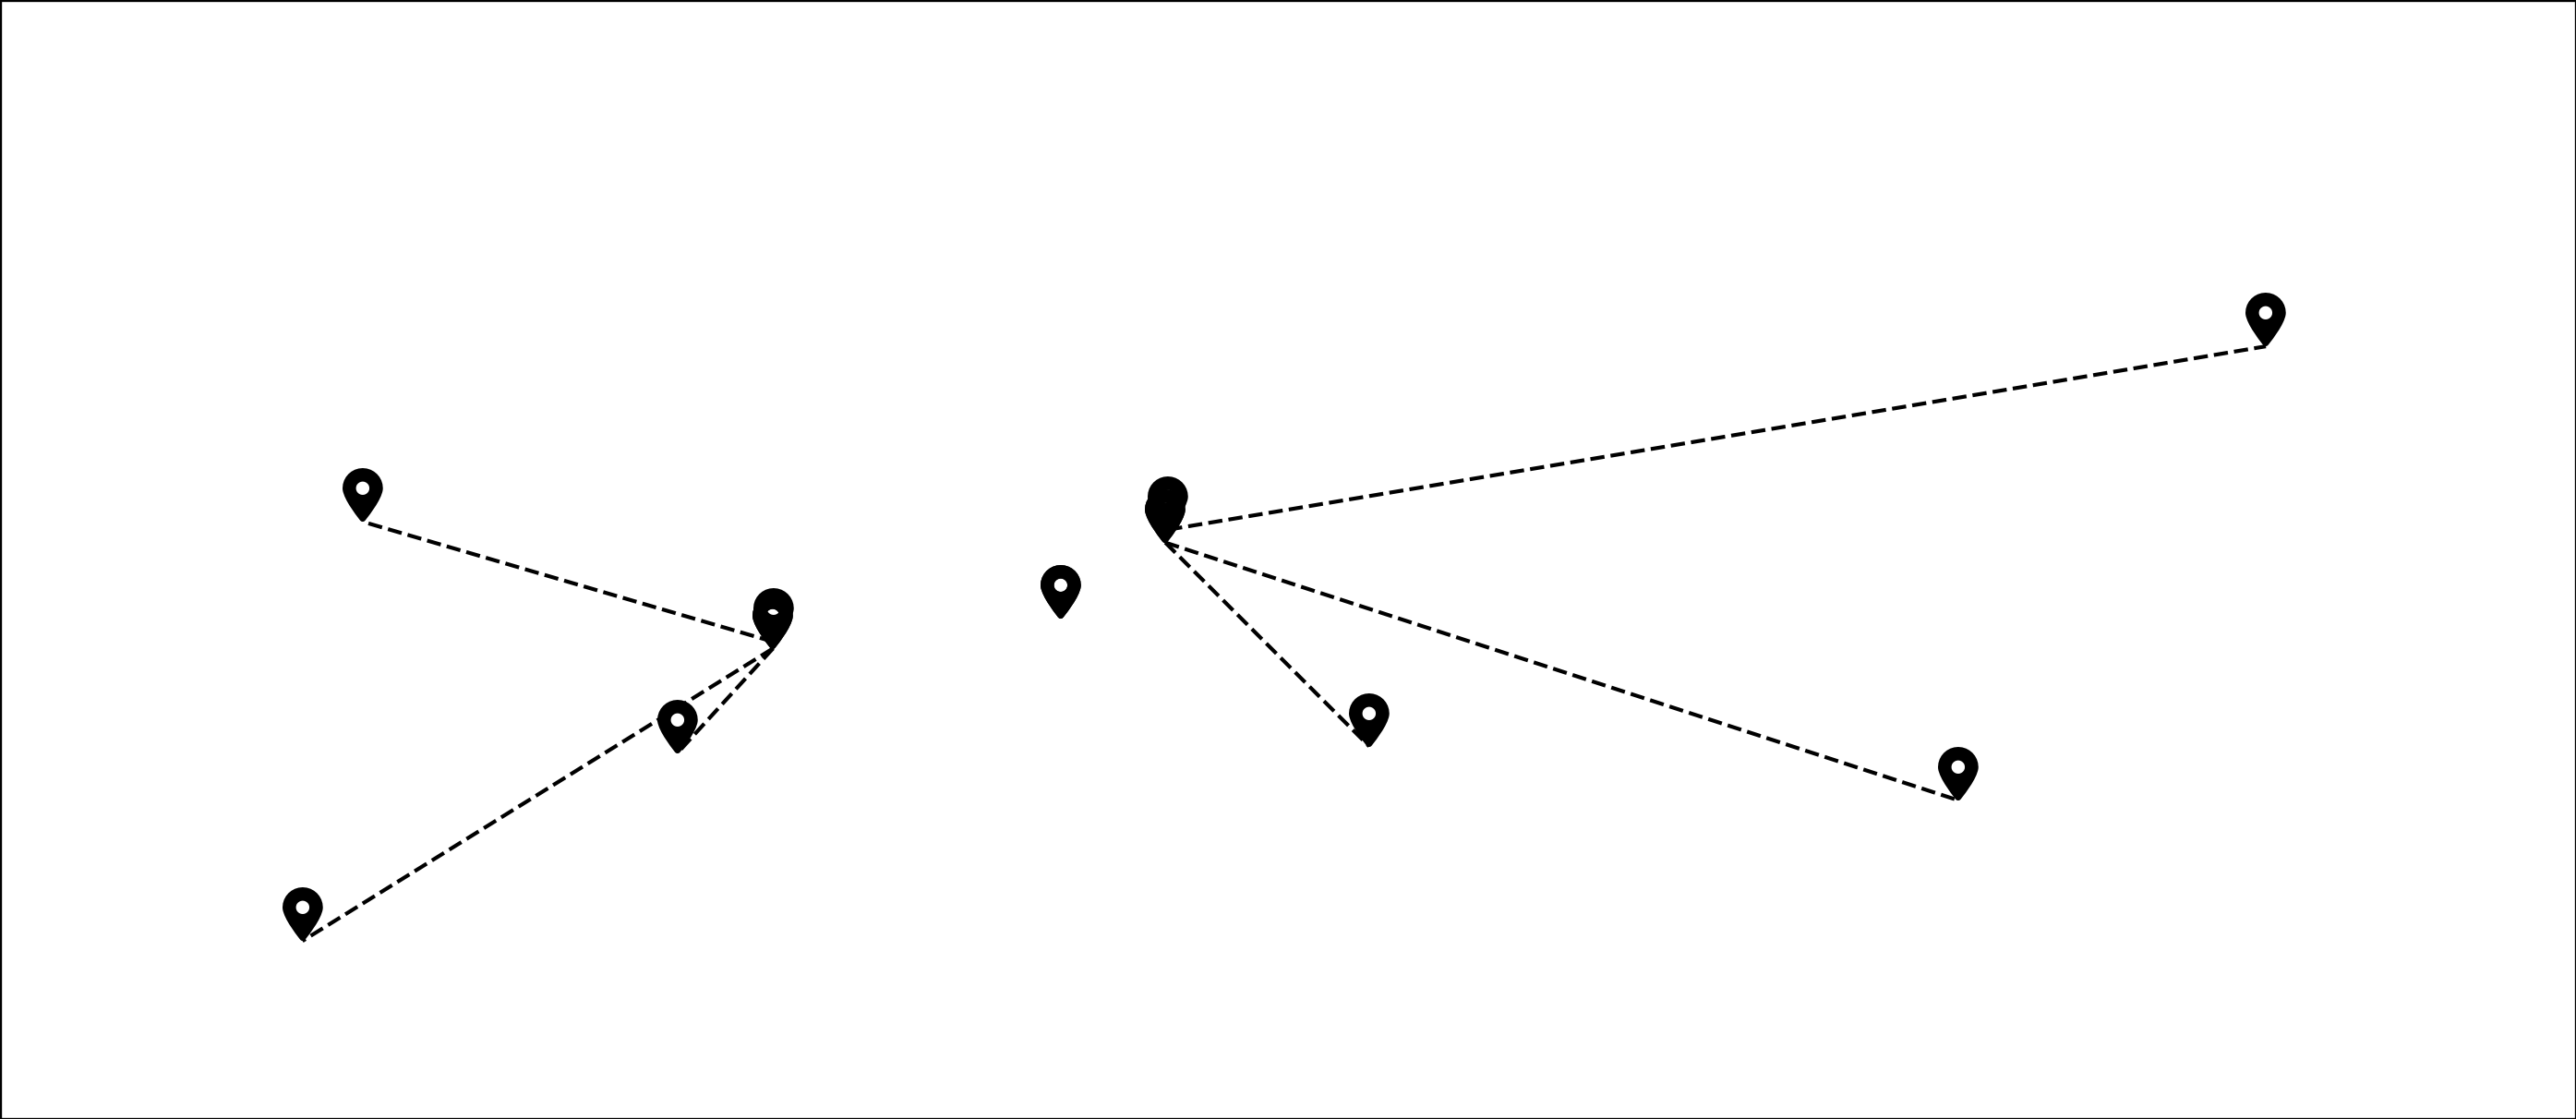

In [27]:
distancefile = "../Data/distance_islands.txt"

with open(distancefile, 'r') as df:
    firstline = df.readline()
    lsplit = firstline.rstrip().split(",")
    islandref = lsplit[0].strip()
    print(islandref)
    
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot(111, projection=myproj)
    ax.set_extent(hikinggc.iccoords)
    
    for lines in df:
        lsplit = lines.rstrip().split(",")
        island1 = lsplit[0].strip()
        island2 = lsplit[1].strip()
        
        lon1 = float(lsplit[3])
        lat1 = float(lsplit[2])
        lon2 = float(lsplit[5])
        lat2 = float(lsplit[4]) 
        mindist = round(haversine.haversine([lat1, lon1], [lat2, lon2]), ndigits=1)

        print(f"{island1} -- {island2} -- {islandref}")
        
        if (island1 == islandref):
           
            ax.plot([lon1, lon2], [lat1, lat2], "k--", ms=3, transform=datacrs, zorder=6)
            ax.text(lon1, lat1, "\uf3c5", fontproperties=fawesome, fontsize=14, 
                    ha="center", va="bottom",
                    transform=datacrs, zorder=7)
            ax.text(lon2, lat2, "\uf3c5", fontproperties=fawesome, fontsize=14, 
                    ha="center", va="bottom",
                    transform=datacrs, zorder=7)
        else:
            ax.add_feature(coast)
            print(f"{islandref}_all")
            plt.savefig(os.path.join(hikinggc.figdir, f"{islandref}_all"))
            plt.close(fig)
            
            fig = plt.figure(figsize=(12, 8))
            ax = plt.subplot(111, projection=myproj)
            ax.set_extent(hikinggc.iccoords)
            ax.plot([lon1, lon2], [lat1, lat2], "k--", ms=3, transform=datacrs, zorder=6)
            ax.text(lon1, lat1, "\uf3c5", fontproperties=fawesome, fontsize=14, 
                    ha="center", va="bottom",
                    transform=datacrs, zorder=7)
            ax.text(lon2, lat2, "\uf3c5", fontproperties=fawesome, fontsize=14, 
                    ha="center", va="bottom",
                    transform=datacrs, zorder=7)

        islandref = island1

In [ ]:
#figdir = f"/home/ctroupin/Projects/Perso/canary-visibility/content/{island_longnames[island1]}/{island_longnames[island2]}/"
figdir = "../figures/coastline/"

if not(os.path.isdir(figdir)):
    os.makedirs(figdir)
if island1 != island2:

    lon1 = float(lsplit[3])
    lat1 = float(lsplit[2])
    lon2 = float(lsplit[5])
    lat2 = float(lsplit[4])

    # Compute min distance
    mindist = round(haversine.haversine([lat1, lon1], [lat2, lon2]), ndigits=1)


    if doplot:

        # Read the corresponding islands
        coastfile1 = os.path.join(coastdir, f"{island1}.geojson")
        coastfile2 = os.path.join(coastdir, f"{island2}.geojson")
        coords1 = read_coords_islands_hr(coastfile1)
        coords2 = read_coords_islands_hr(coastfile2)


        fig = plt.figure(figsize=(12, 8))
        ax = plt.subplot(111, projection=myproj)
        ax.plot([lon1, lon2], [lat1, lat2], "k--", ms=3, transform=datacrs, zorder=6)
        ax.text(lon1, lat1, "\uf3c5", fontproperties=fawesome, fontsize=14, 
                ha="center", va="bottom",
                transform=datacrs, zorder=7)
        ax.text(lon2, lat2, "\uf3c5", fontproperties=fawesome, fontsize=14, 
                ha="center", va="bottom",
                transform=datacrs, zorder=7)

        # Add markers
        ttt = ax.text(0.6 * lon1 + 0.4 * lon2, 0.6 * lat1 + 0.4 * lat2, f"{mindist} km", 
                      fontproperties=myfont, 
                      ha="center", va="center", transform=datacrs, fontsize=16, zorder=7)
        ttt.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='.9'))
        add_island_hr(coords1, ax)
        add_island_hr(coords2, ax)



        ax.add_feature(coast, linestyle="--", color=".85", linewidth=.5, zorder=1)
        ax.spines['geo'].set_color("w")

        # Save figure in the correct directory
        figname = f"mindist_{island1}_{island2}_hr"
        plt.savefig(os.path.join(figdir, figname))
        print(f"Printing {figname} in {figdir}")
        plt.close()
else:
    print(f"Same island")